In [13]:
#사이킷런 패키지를 필요로 합니다. 설치하지 않았다면 아래 코드를 이용해 설치해 주세요.
!pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# roc curve and auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [3]:
#한국어가 들어있는 파일은 파이썬에서 읽을 때 오류가 납니다. 영어만 사용하는 것을 권장합니다.
df = pd.read_csv('./GastricNormal2.csv', index_col=0)

In [4]:
#전달해주신 데이터는 1~100번째 sample을 제외하고는 stage, gender 정보가 없어서 1~100번째 sample만 사용했습니다.
df = df[0:100]

In [5]:
#각 stage 정보 'IA', 'IIA', 'IIIB', 'IB', 'IIIA', 'IIB', 'IIIC', 'IV'를 각각 0, 2, 5, 1, 4, 3, 6, 7로 자동 변환하여 stage_encoded라는 column으로 저장하는 코드입니다.

stage = df['stage'].values

encoder = LabelEncoder()
encoder.fit(stage)
labels = encoder.transform(stage)

df['stage_encoded'] = labels

In [6]:
#stage_encoded의 대소 비교를 통해 stage I~II를 0으로, III~IV를 1로 분류하여 stage_encoded2라는 column으로 저장하는 코드입니다.

stage = []

for i in range(0,len(df)):
    if df['stage_encoded'][i+1] >= 4:
        stage.append(0)
    else:
        stage.append(1)
    
df['stage_encoded2'] = stage


#gender M = 0, F = 1로 분류하여 gender_encoded라는 column으로 저장하는 코드입니다.

gender = []

for i in range(0,len(df)):
    if df['gender'][i+1] == 'M':
        gender.append(0)
    elif df['gender'][i+1] == 'F':
        gender.append(1)

df['gender_encoded'] = gender

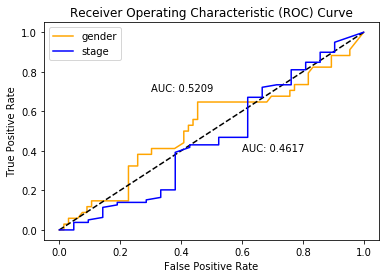

In [7]:
#concentration을 기준으로 해서, gender, stage 분류를 적용한 ROC curve입니다.


#gender_encoded를 이용하여 주황색 plot을 그립니다.

probs = df['concentration'].values
testy = df['gender_encoded'].values

fpr, tpr, thresholds = roc_curve(testy, probs)

plt.plot(fpr, tpr, color='orange', label='gender')


#y=x에 해당하는 검은 점선을 그립니다.
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

#AUC를 계산하여 x=0.3, y=0.7 좌표에 적어넣습니다.
auc = roc_auc_score(testy, probs)
plt.text(0.3,0.7,'AUC: %.4f' % auc)


#stage_encoded2를 이용하여 파란색 plot을 그립니다.

probs2 = df['concentration'].values
testy2 = df['stage_encoded2'].values

fpr, tpr, thresholds = roc_curve(testy2, probs2)

plt.plot(fpr, tpr, color='blue', label='stage')

#AUC를 계산하여 x=0.6, y=0.4 좌표에 적어넣습니다.
auc = roc_auc_score(testy2, probs2)
plt.text(0.6,0.4,'AUC: %.4f' % auc)

plt.legend()

#ROC.png 파일로 저장합니다.
plt.savefig('./ROC.png', dpi=300, bbox_inches='tight')